### Importing the required Python libraries to the notebook.

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

import pandas as pd

import sklearn

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from matplotlib import pyplot as plt


Using TensorFlow backend.


### Reading the data file (video_data.csv) into a Pandas data frame

In [2]:
df = pd.read_csv('video_data.csv')

### Displaying the first five data points of the file

In [3]:
df.head()

,Likes,Dislikes,Subscribers,Views
0,104460,3365,7300000,1988888
1,103203,3570,3300000,2617005
2,22485,612,1800000,932230
3,23077,1337,465000,1165800
4,12315,522,11000000,551165


### Obtaining the descriptive statistics of no of likes, no of dislikes, no of subscribers and no of views.

In [4]:
df.describe()

,Likes,Dislikes,Subscribers,Views
count,3.364000e+03,3.364000e+03,3.364000e+03,3.364000e+03
mean,1.298265e+05,1.177348e+04,2.486401e+06,2.110672e+07
std,5.845796e+05,1.857651e+05,5.676479e+06,1.143878e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
25%,5.850000e+02,2.800000e+01,4.600000e+04,3.831525e+04
50%,5.535000e+03,2.205000e+02,3.910000e+05,4.493690e+05
75%,4.092750e+04,2.059000e+03,1.800000e+06,4.022392e+06
max,1.024205e+07,9.653039e+06,7.100000e+07,2.668027e+09


### Drawing the scatter plots that show the no of views against the no of likes, no of dislikes and no of subscribers.

Codes (Plot 1 -  No of views Vs. No of likes)

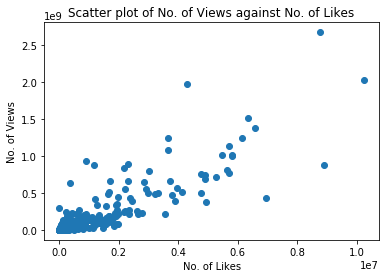

In [5]:
plt.scatter(df['Likes'], df['Views'])
plt.title("Scatter plot of No. of Views against No. of Likes")
plt.xlabel("No. of Likes")
plt.ylabel("No. of Views")
plt.show()

Codes (Plot 2 - No of views Vs. No of dislikes)

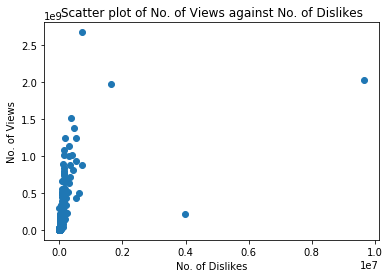

In [6]:
plt.scatter(df['Dislikes'], df['Views'])
plt.title("Scatter plot of No. of Views against No. of Dislikes")
plt.xlabel("No. of Dislikes")
plt.ylabel("No. of Views")
plt.show()

Codes (Plot 3 -  No of views Vs. No of subscribers)

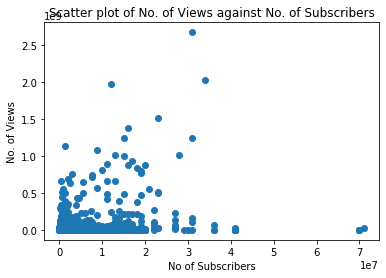

In [7]:
plt.scatter(df['Subscribers'],df['Views'])
plt.title("Scatter plot of No. of Views against No. of Subscribers")
plt.xlabel("No of Subscribers")
plt.ylabel("No. of Views")
plt.show()

### Splitting the dataset into two datasets for the training and testing

In [8]:
df_train, df_test = train_test_split(df, test_size=0.2)

### Scale training and testing data (no of likes, no of dislikes and no of subscribers) of the training dataset to mean 0 and standard deviation 1

In [9]:
X_train = df_train[["Likes", "Dislikes", "Subscribers"]].copy()
Y_train = df_train[["Views"]].copy()
X_test = df_test[["Likes", "Dislikes", "Subscribers"]].copy()
Y_test = df_test[["Views"]].copy()

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

### Designing a linear regression model using the training dataset

<b><u>Note:</u></b> Add “\_reg” suffix to each variable you define for the regression model as in “model\_reg” here after.

In [10]:
model_reg = Sequential()
model_reg.add(Dense(1, input_shape=(3,), activation = 'linear'))
model_reg.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


### Compiling the model using “Adam” optimizer (instead of SGD) with the learning rate 10,000 and loss as mean squared error.

In [11]:
model_reg.compile(Adam(lr=10000), 'mean_squared_error')

### Fit the model using the training dataset using batch size as 32, no of epochs as 1000 and verbose as 1.

In [12]:
history_reg = model_reg.fit(X_train, Y_train, epochs = 1000,  verbose = 1)




Epoch 1/1000





2691/2691 [==============================] - 1s 224us/step - loss: 13656301595059768.0000
Epoch 2/1000
2691/2691 [==============================] - 0s 41us/step - loss: 13509286055519222.0000
Epoch 3/1000
2691/2691 [==============================] - 0s 40us/step - loss: 13378355628300872.0000
Epoch 4/1000
2691/2691 [==============================] - 0s 42us/step - loss: 13246833626694136.0000
Epoch 5/1000
2691/2691 [==============================] - 0s 41us/step - loss: 13120351431973472.0000
Epoch 6/1000
2691/2691 [==============================] - 0s 39us/step - loss: 12998778211371286.0000
Epoch 7/1000
2691/2691 [==============================] - 0s 41us/step - loss: 12875886680649288.0000
Epoch 8/1000
2691/2691 [==============================] - 0s 37us/step - loss: 12755331388256962.0000
Epoch 9/1000
2691/2691 [==============================] - 0s 41us/step - loss: 12636588876694648.0000
Epoch 10/1000
2691/2691 [==============================] - 0s 41us/step -

2691/2691 [==============================] - 0s 48us/step - loss: 4861087137299713.0000
Epoch 144/1000
2691/2691 [==============================] - 0s 44us/step - loss: 4835609747778273.0000
Epoch 145/1000
2691/2691 [==============================] - 0s 38us/step - loss: 4810089506904532.0000
Epoch 146/1000
2691/2691 [==============================] - 0s 37us/step - loss: 4783469427630728.0000
Epoch 147/1000
2691/2691 [==============================] - 0s 35us/step - loss: 4758389435390840.0000
Epoch 148/1000
2691/2691 [==============================] - 0s 36us/step - loss: 4734257818621817.0000
Epoch 149/1000
2691/2691 [==============================] - 0s 37us/step - loss: 4709743993071860.0000
Epoch 150/1000
2691/2691 [==============================] - 0s 35us/step - loss: 4685461969727261.0000
Epoch 151/1000
2691/2691 [==============================] - 0s 37us/step - loss: 4661118554044845.0000
Epoch 152/1000
2691/2691 [==============================] - 0s 36us/step - loss: 4638610

2691/2691 [==============================] - 0s 37us/step - loss: 3147007284405426.5000
Epoch 302/1000
2691/2691 [==============================] - 0s 36us/step - loss: 3145977876376216.5000
Epoch 303/1000
2691/2691 [==============================] - 0s 37us/step - loss: 3143031138533589.0000
Epoch 304/1000
2691/2691 [==============================] - 0s 35us/step - loss: 3140963670424236.0000
Epoch 305/1000
2691/2691 [==============================] - 0s 36us/step - loss: 3139344048837108.5000
Epoch 306/1000
2691/2691 [==============================] - 0s 36us/step - loss: 3137146470177991.0000
Epoch 307/1000
2691/2691 [==============================] - 0s 36us/step - loss: 3135407777608305.5000
Epoch 308/1000
2691/2691 [==============================] - 0s 35us/step - loss: 3132088312523781.5000
Epoch 309/1000
2691/2691 [==============================] - 0s 36us/step - loss: 3130646739422497.0000
Epoch 310/1000
2691/2691 [==============================] - 0s 36us/step - loss: 3127940

2691/2691 [==============================] - 0s 38us/step - loss: 2831361290398165.5000
Epoch 460/1000
2691/2691 [==============================] - 0s 34us/step - loss: 2831140188687247.0000
Epoch 461/1000
2691/2691 [==============================] - 0s 36us/step - loss: 2828965679309351.0000
Epoch 462/1000
2691/2691 [==============================] - 0s 36us/step - loss: 2828470664981668.0000
Epoch 463/1000
2691/2691 [==============================] - 0s 37us/step - loss: 2827521773935997.5000
Epoch 464/1000
2691/2691 [==============================] - 0s 36us/step - loss: 2827108715539468.0000
Epoch 465/1000
2691/2691 [==============================] - 0s 37us/step - loss: 2825375814638115.5000
Epoch 466/1000
2691/2691 [==============================] - 0s 37us/step - loss: 2824779097156279.0000
Epoch 467/1000
2691/2691 [==============================] - 0s 36us/step - loss: 2823679220273567.5000
Epoch 468/1000
2691/2691 [==============================] - 0s 37us/step - loss: 2822953

2691/2691 [==============================] - 0s 38us/step - loss: 2758905303940030.0000
Epoch 618/1000
2691/2691 [==============================] - 0s 35us/step - loss: 2759584618120434.5000
Epoch 619/1000
2691/2691 [==============================] - 0s 35us/step - loss: 2759082706092452.0000
Epoch 620/1000
2691/2691 [==============================] - 0s 36us/step - loss: 2758806534075559.5000
Epoch 621/1000
2691/2691 [==============================] - 0s 38us/step - loss: 2757889488009468.0000
Epoch 622/1000
2691/2691 [==============================] - 0s 37us/step - loss: 2758287016859811.5000
Epoch 623/1000
2691/2691 [==============================] - 0s 35us/step - loss: 2758032835924444.5000
Epoch 624/1000
2691/2691 [==============================] - 0s 36us/step - loss: 2758775987392830.0000
Epoch 625/1000
2691/2691 [==============================] - 0s 37us/step - loss: 2757470089952056.0000
Epoch 626/1000
2691/2691 [==============================] - 0s 36us/step - loss: 2757500

2691/2691 [==============================] - 0s 41us/step - loss: 2746682783657294.5000
Epoch 776/1000
2691/2691 [==============================] - 0s 36us/step - loss: 2746671492791212.0000
Epoch 777/1000
2691/2691 [==============================] - 0s 34us/step - loss: 2746747738905951.0000
Epoch 778/1000
2691/2691 [==============================] - 0s 35us/step - loss: 2746216941078982.0000
Epoch 779/1000
2691/2691 [==============================] - 0s 35us/step - loss: 2746619293663646.0000
Epoch 780/1000
2691/2691 [==============================] - 0s 40us/step - loss: 2746660709199779.5000
Epoch 781/1000
2691/2691 [==============================] - 0s 36us/step - loss: 2746342038873138.5000
Epoch 782/1000
2691/2691 [==============================] - 0s 36us/step - loss: 2746573742956346.0000
Epoch 783/1000
2691/2691 [==============================] - 0s 35us/step - loss: 2746360131686809.5000
Epoch 784/1000
2691/2691 [==============================] - 0s 43us/step - loss: 2746416

2691/2691 [==============================] - 0s 35us/step - loss: 2744851231321721.0000
Epoch 934/1000
2691/2691 [==============================] - 0s 36us/step - loss: 2744471802426036.5000
Epoch 935/1000
2691/2691 [==============================] - 0s 36us/step - loss: 2744206468552831.0000
Epoch 936/1000
2691/2691 [==============================] - 0s 35us/step - loss: 2744537558391057.5000
Epoch 937/1000
2691/2691 [==============================] - 0s 35us/step - loss: 2744260659781818.0000
Epoch 938/1000
2691/2691 [==============================] - 0s 40us/step - loss: 2744473264613346.5000
Epoch 939/1000
2691/2691 [==============================] - 0s 43us/step - loss: 2745317470953749.0000
Epoch 940/1000
2691/2691 [==============================] - 0s 49us/step - loss: 2743978297721343.0000
Epoch 941/1000
2691/2691 [==============================] - 0s 46us/step - loss: 2744507094711875.5000 0s - loss: 2879504178299742.50
Epoch 942/1000
2691/2691 [==============================]

### Plotting the loss of the training process against the epochs.

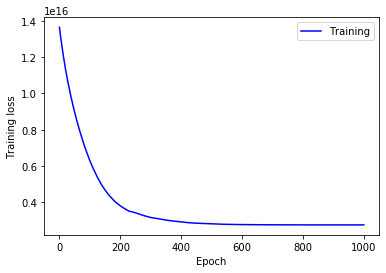

In [13]:
history_dict_reg = history_reg.history
loss_reg = history_dict_reg['loss']
plt.figure()
plt.plot(loss_reg, 'b')
plt.legend(['Training'])
plt.ylabel("Training loss")
plt.xlabel("Epoch")
plt.show()

### Getting the predicted no of views for the training and testing datasets

In [14]:
Y_train_pred_reg = model_reg.predict(X_train)
Y_test_pred_reg = model_reg.predict(X_test)

### Drawing scatter plots that show the predicted no of views against the original no of views for the training and testing datasets

Codes (Plot 1 - Predicted no of views Vs. Original no of views for the training dataset)

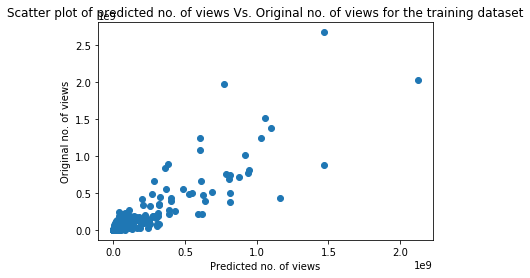

In [15]:
plt.scatter(Y_train_pred_reg,Y_train)
plt.title("Scatter plot of predicted no. of views Vs. Original no. of views for the training dataset")
plt.xlabel("Predicted no. of views")
plt.ylabel("Original no. of views")
plt.show()

Codes (Plot 2 - Predicted no of views Vs. Original no of views for the testing dataset)

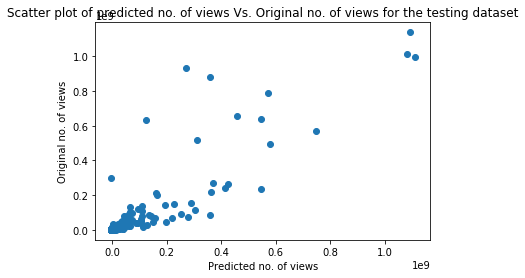

In [16]:
plt.scatter(Y_test_pred_reg,Y_test)
plt.title("Scatter plot of predicted no. of views Vs. Original no. of views for the testing dataset")
plt.xlabel("Predicted no. of views")
plt.ylabel("Original no. of views")
plt.show()

### Computing the $R^2$ values for these predicted no of views and original no of views for both training and testing datasets

In [17]:
print("Training dataset:\t{:0.3f}".format(r2_score(Y_train, Y_train_pred_reg)))
print("Testing dataset:\t{:0.3f}".format(r2_score(Y_test, Y_test_pred_reg)))

Training dataset:	0.795
Testing dataset:	0.778


### Designing a neural network with 4 hidden layers, each layer contains 13 neurons

<b><u>Note:</u></b> Add “\_dnn” suffix to each variable you define for the deep neural network model as in ‘model\_dnn’ here after.

In [18]:
model_dnn = Sequential()
model_dnn.add(Dense(13, input_shape=(3,), activation='relu'))
model_dnn.add(Dense(13, activation='relu'))
model_dnn.add(Dense(13, activation='relu'))
model_dnn.add(Dense(13, activation='relu'))
model_dnn.add(Dense(13, activation='relu'))
model_dnn.add(Dense(1,))
model_dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 13)                52        
_________________________________________________________________
dense_3 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_4 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_5 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_6 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 14        
Total params: 794
Trainable params: 794
Non-trainable params: 0
_________________________________________________________________


### Compiling the model using “Adam” optimizer (instead of SGD) with the learning rate 0.003 and loss as mean squared error.

In [19]:
model_dnn.compile(Adam(lr=0.003), 'mean_squared_error')

### Fitting the model using the training dataset using batch size as 32, no of epochs as 1000 and verbose as 1.

In [20]:
history_dnn = model_dnn.fit(X_train, Y_train, epochs = 1000,  verbose = 1)

Epoch 1/1000
2691/2691 [==============================] - 2s 671us/step - loss: 13781772213047810.0000
Epoch 2/1000
2691/2691 [==============================] - 0s 76us/step - loss: 13781646988909890.0000
Epoch 3/1000
2691/2691 [==============================] - 0s 64us/step - loss: 13780557390296910.0000
Epoch 4/1000
2691/2691 [==============================] - 0s 56us/step - loss: 13773500516464860.0000
Epoch 5/1000
2691/2691 [==============================] - 0s 62us/step - loss: 13719893619864810.0000
Epoch 6/1000
2691/2691 [==============================] - 0s 79us/step - loss: 13569921260248830.0000
Epoch 7/1000
2691/2691 [==============================] - 0s 71us/step - loss: 13238966709220684.0000
Epoch 8/1000
2691/2691 [==============================] - 0s 75us/step - loss: 12603798324808518.0000
Epoch 9/1000
2691/2691 [==============================] - 0s 72us/step - loss: 11516019281908616.0000
Epoch 10/1000
2691/2691 [==============================] - 0s 57us/step - loss: 1

2691/2691 [==============================] - 0s 57us/step - loss: 2774292837491969.5000
Epoch 82/1000
2691/2691 [==============================] - 0s 53us/step - loss: 2771223549797286.5000
Epoch 83/1000
2691/2691 [==============================] - 0s 65us/step - loss: 2769146517735330.5000
Epoch 84/1000
2691/2691 [==============================] - 0s 77us/step - loss: 2793849140485185.0000
Epoch 85/1000
2691/2691 [==============================] - 0s 68us/step - loss: 2769639121241160.0000
Epoch 86/1000
2691/2691 [==============================] - 0s 74us/step - loss: 2773639927058165.5000
Epoch 87/1000
2691/2691 [==============================] - 0s 63us/step - loss: 2807897622542691.5000
Epoch 88/1000
2691/2691 [==============================] - 0s 52us/step - loss: 2757872184062297.5000
Epoch 89/1000
2691/2691 [==============================] - 0s 53us/step - loss: 2766221630148810.5000
Epoch 90/1000
2691/2691 [==============================] - 0s 52us/step - loss: 2757375514267235

2691/2691 [==============================] - 0s 54us/step - loss: 2781995230710177.5000
Epoch 240/1000
2691/2691 [==============================] - 0s 54us/step - loss: 2763267551536361.5000
Epoch 241/1000
2691/2691 [==============================] - 0s 50us/step - loss: 2771570119320474.5000
Epoch 242/1000
2691/2691 [==============================] - 0s 52us/step - loss: 2803442029222508.5000
Epoch 243/1000
2691/2691 [==============================] - 0s 54us/step - loss: 2767441389653828.5000
Epoch 244/1000
2691/2691 [==============================] - 0s 54us/step - loss: 2755430312464605.0000
Epoch 245/1000
2691/2691 [==============================] - 0s 52us/step - loss: 2762835630206804.0000
Epoch 246/1000
2691/2691 [==============================] - 0s 52us/step - loss: 2773357397756394.5000
Epoch 247/1000
2691/2691 [==============================] - 0s 54us/step - loss: 2780571466937347.5000
Epoch 248/1000
2691/2691 [==============================] - 0s 50us/step - loss: 2746359

2691/2691 [==============================] - 0s 62us/step - loss: 2744124094426684.0000
Epoch 397/1000
2691/2691 [==============================] - 0s 54us/step - loss: 2757113652964423.0000
Epoch 398/1000
2691/2691 [==============================] - 0s 58us/step - loss: 2751893227513869.0000
Epoch 399/1000
2691/2691 [==============================] - 0s 56us/step - loss: 2753798225821075.0000
Epoch 400/1000
2691/2691 [==============================] - 0s 52us/step - loss: 2776165131552376.0000
Epoch 401/1000
2691/2691 [==============================] - 0s 78us/step - loss: 2747583265136856.5000
Epoch 402/1000
2691/2691 [==============================] - 0s 72us/step - loss: 2778063894081199.5000
Epoch 403/1000
2691/2691 [==============================] - 0s 82us/step - loss: 2792952253249441.0000
Epoch 404/1000
2691/2691 [==============================] - 0s 107us/step - loss: 2753057240813186.0000
Epoch 405/1000
2691/2691 [==============================] - 0s 106us/step - loss: 27867

2691/2691 [==============================] - 0s 55us/step - loss: 2731992190002056.5000
Epoch 555/1000
2691/2691 [==============================] - 0s 51us/step - loss: 2745451984651092.0000
Epoch 556/1000
2691/2691 [==============================] - 0s 57us/step - loss: 2728001667465946.5000
Epoch 557/1000
2691/2691 [==============================] - 0s 52us/step - loss: 2701192258577537.5000
Epoch 558/1000
2691/2691 [==============================] - 0s 56us/step - loss: 2739710226608978.5000
Epoch 559/1000
2691/2691 [==============================] - 0s 59us/step - loss: 2689882190348263.5000
Epoch 560/1000
2691/2691 [==============================] - 0s 74us/step - loss: 2688138304956648.0000
Epoch 561/1000
2691/2691 [==============================] - 0s 74us/step - loss: 2720491209476049.5000
Epoch 562/1000
2691/2691 [==============================] - 0s 73us/step - loss: 2730980169458129.5000
Epoch 563/1000
2691/2691 [==============================] - 0s 80us/step - loss: 2686246

2691/2691 [==============================] - 0s 54us/step - loss: 2575869903163186.5000
Epoch 712/1000
2691/2691 [==============================] - 0s 55us/step - loss: 2574307639214025.5000
Epoch 713/1000
2691/2691 [==============================] - 0s 53us/step - loss: 2598711678928698.5000
Epoch 714/1000
2691/2691 [==============================] - 0s 53us/step - loss: 2599609320189731.0000
Epoch 715/1000
2691/2691 [==============================] - 0s 51us/step - loss: 2576813224344559.0000
Epoch 716/1000
2691/2691 [==============================] - 0s 54us/step - loss: 2587802761755332.5000
Epoch 717/1000
2691/2691 [==============================] - 0s 52us/step - loss: 2600565448164929.5000
Epoch 718/1000
2691/2691 [==============================] - 0s 67us/step - loss: 2572901708745657.5000
Epoch 719/1000
2691/2691 [==============================] - 0s 82us/step - loss: 2577412056436323.5000
Epoch 720/1000
2691/2691 [==============================] - 0s 71us/step - loss: 2581039

2691/2691 [==============================] - 0s 82us/step - loss: 2451493881133770.5000
Epoch 870/1000
2691/2691 [==============================] - 0s 74us/step - loss: 2445963238498970.5000
Epoch 871/1000
2691/2691 [==============================] - 0s 67us/step - loss: 2478311637811066.0000
Epoch 872/1000
2691/2691 [==============================] - 0s 53us/step - loss: 2464049662690461.0000
Epoch 873/1000
2691/2691 [==============================] - 0s 54us/step - loss: 2460949702768788.0000
Epoch 874/1000
2691/2691 [==============================] - 0s 56us/step - loss: 2443181058369792.5000
Epoch 875/1000
2691/2691 [==============================] - 0s 54us/step - loss: 2430997560211160.0000
Epoch 876/1000
2691/2691 [==============================] - 0s 53us/step - loss: 2436777503122501.0000
Epoch 877/1000
2691/2691 [==============================] - 0s 56us/step - loss: 2434963772865902.5000
Epoch 878/1000
2691/2691 [==============================] - 0s 54us/step - loss: 2423584

### Plotting the loss of the training process against the epochs.

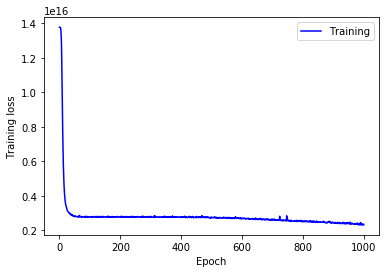

In [21]:
history_dict_dnn = history_dnn.history
loss_dnn = history_dict_dnn['loss']
plt.figure()
plt.plot(loss_dnn, 'b')
plt.legend(['Training'])
plt.ylabel("Training loss")
plt.xlabel("Epoch")
plt.show()

### Getting the predicted no of views for the training and testing datasets.

In [22]:
Y_train_pred_dnn = model_dnn.predict(X_train)
Y_test_pred_dnn = model_dnn.predict(X_test)

### Drawing scatter plots that show the predicted no of views against the original no of views for the training and testing datasets

Codes (Plot 1 - Predicted no of views Vs. Original no of views for the training dataset)

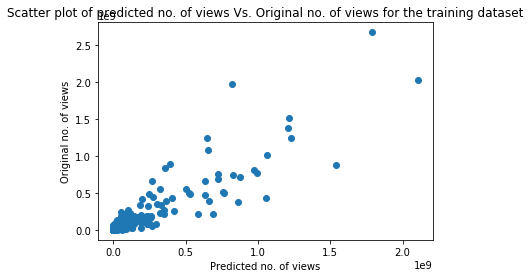

In [23]:
plt.scatter(Y_train_pred_dnn,Y_train)
plt.title("Scatter plot of predicted no. of views Vs. Original no. of views for the training dataset")
plt.xlabel("Predicted no. of views")
plt.ylabel("Original no. of views")
plt.show()

Codes (Plot 2 - Predicted no of views Vs. Original no of views for the testing dataset)

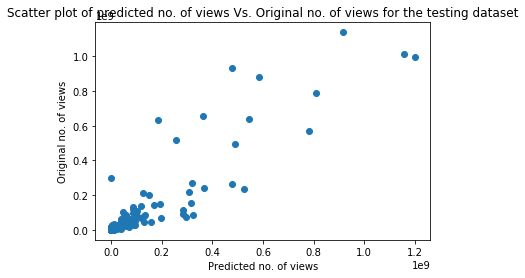

In [24]:
plt.scatter(Y_test_pred_dnn,Y_test)
plt.title("Scatter plot of predicted no. of views Vs. Original no. of views for the testing dataset")
plt.xlabel("Predicted no. of views")
plt.ylabel("Original no. of views")
plt.show()

### Computing the $R^2$ values for these predicted no of views and original no of views for both training and testing datasets

In [25]:
print("Training dataset:\t{:0.3f}".format(r2_score(Y_train, Y_train_pred_dnn)))
print("Testing dataset:\t{:0.3f}".format(r2_score(Y_test, Y_test_pred_dnn)))

Training dataset:	0.830
Testing dataset:	0.832


### Conculsion

R2 values of the Deep Neural Network is closer to 1 than of the Linear Regression model. Since, closeness of R2 to 1 indicated a good fit of model, the second model (Deep Neural Network) is more appropriate for predicting the no. of Views. 

<center><h2>---END---</h2></center>